# Correlation Analysis of Market Mood Index vs NIFTY Index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.columns = [col.strip() for col in data.columns]

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Correlation Analysis

In [2]:
correlation = data[['Market Mood Index', 'Nifty Index']].corr()
correlation

,Market Mood Index,Nifty Index
Market Mood Index,1.000000,-0.016494
Nifty Index,-0.016494,1.000000


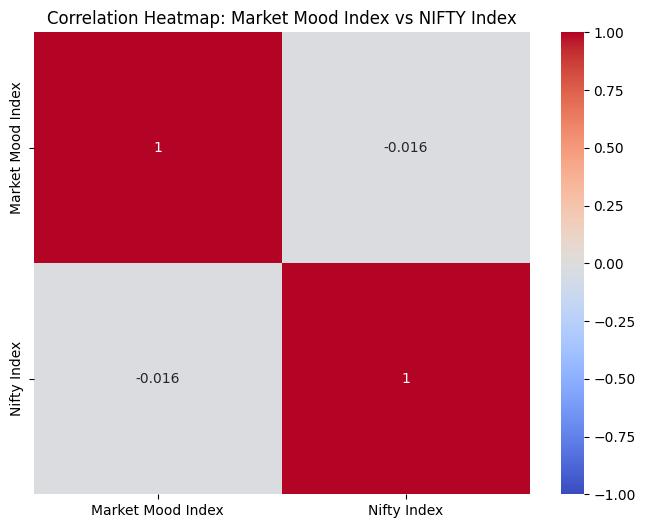

In [3]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Market Mood Index vs NIFTY Index')
plt.show()

## Lagged Correlation Analysis

In [4]:
for lag in range(1, 8):
    data[f'MMI_Lag_{lag}'] = data['Market Mood Index'].shift(lag)

lagged_correlation = data.corr()['Nifty Index'][1:8]
lagged_correlation

Market Mood Index   -0.016494
Nifty Index          1.000000
MMI_Lag_1           -0.020082
MMI_Lag_2           -0.025544
MMI_Lag_3           -0.030300
MMI_Lag_4           -0.035038
MMI_Lag_5           -0.039961
Name: Nifty Index, dtype: float64

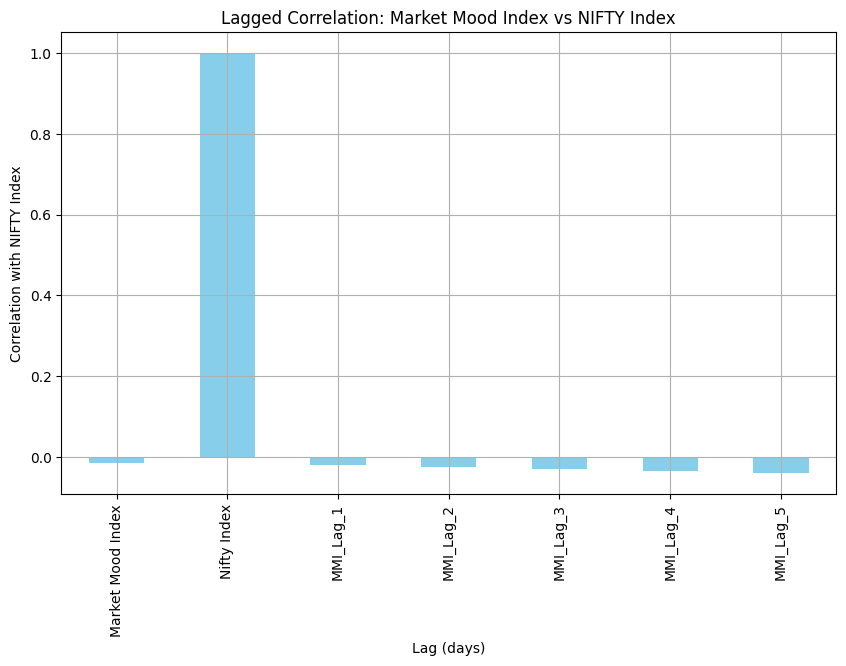

In [5]:
plt.figure(figsize=(10, 6))
lagged_correlation.plot(kind='bar', color='skyblue')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation with NIFTY Index')
plt.title('Lagged Correlation: Market Mood Index vs NIFTY Index')
plt.grid(True)
plt.show()